# UI - Case 1 for Yelp User Modeling

<br> Before started this visualization, you shall have generated data by following this ReadMe file
<br> ReadMe file: 

In [1]:
from joblib import load
import sys
sys.path.append('src/python')
import modeling as train
from main import *

# parameter that UI user are encouraged to control 
coef_topK = 50 #top coefficients with large magnitude

# please not change the following 
App = myapp()
io_config = App.init_IO()
logger = App.init_logging(io_config["log path"], "UI-case1.log")
case1_model_artefact_path = io_config["modelArtefact path"]
feature_names_path = io_config["featureNames path"]

# variables to display graph
feature_names = list(pd.read_csv(feature_names_path, sep=" ", header=None)[0])
clf = load(case1_model_artefact_path)
coef = clf.coef_[0]
fig_path_coef = ""

# variables to prepare topK-coefficient table 
coef_df = pd.DataFrame(coef, columns=['coef'])
coef_df['feature'] = feature_names
coef_df['abs(coef)'] = coef_df['coef'].apply(lambda x: abs(x))
coef_topK_df = coef_df.sort_values(['abs(coef)'], ascending=False).reset_index().loc[:coef_topK-1]

## Understand the key contributing factors for users to give high stars from LR coefficients
<br> From this example, we observed that 
<li> "votes" plays the most dramatic role in how likely an user give high/low-star reviews; more votes on "funny" (also more votes on "useful") lead to a tendency to give low stars, that's probably because the other users feel this user's review more useful when it's negative-trending; in comparison, more votes on "cool" lead to increasing tendency to give high-star reviews </li>
<li> this observations on "votes" aligns well with "compliments"  
<li> In addition, increasing review_counts are negatively correlated with high-star reviewers, and increasing friends (or fans) are positively correlated with high-star reviewers.</li>
<li> Some other features play less significant role, such as "elite" (elite_year), and "compliments-cute"

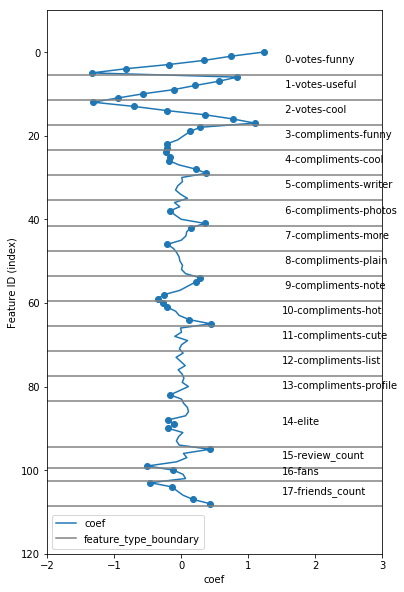

In [2]:
train.plot_coefficients(feature_names, coef, coef_topK, fig_path_coef, False)

## Table display of top-coefficient features

In [3]:
coef_topK_df

,index,coef,feature,abs(coef)
0,5,-1.333009,votes-funny_bucket_5,1.333009
1,12,-1.314414,votes-cool_bucket_0,1.314414
2,0,1.236864,votes-funny_bucket_0,1.236864
3,17,1.099358,votes-cool_bucket_5,1.099358
4,11,-0.947707,votes-useful_bucket_5,0.947707
5,6,0.840397,votes-useful_bucket_0,0.840397
6,4,-0.825949,votes-funny_bucket_4,0.825949
7,16,0.768446,votes-cool_bucket_4,0.768446
8,1,0.747832,votes-funny_bucket_1,0.747832
9,13,-0.709296,votes-cool_bucket_1,0.709296
